## Example lab: Obtaining and plotting earthquake data

### Other ideas include

#### - Plotting number of events as a function of time during aftershock sequences and fitting parameters to the Omori law formula 
#### - Earthquake probability and recurrence rates


### The following function can be used to download earthquake data for any region or magnitude range

Students would not have to alter this

In [1]:
import obspy as op ## Not in standard Anaconda distribution 
from obspy.clients.fdsn import Client ## Not in standard Anaconda distribution 
import datetime

def get_earthquakes(eventbox,minmag=4,mindepth=0):

    '''
    Get all events that have occured in the cruise region since the arrival date
    '''

    client = Client('IRIS')
    starttime = op.UTCDateTime('1970-01-01')
    now = op.UTCDateTime(datetime.datetime.today())

    quakecat = client.get_events(starttime=op.UTCDateTime(starttime), endtime=op.UTCDateTime(now), 
        minlongitude=eventbox[0], maxlongitude=eventbox[1], minlatitude=eventbox[2], maxlatitude=eventbox[3], 
        minmagnitude=minmag,mindepth=mindepth)

    quakefile = open("Events_since_1970.dat",'w')

    for event in quakecat:
        lon = event.origins[0].longitude
        lat = event.origins[0].latitude
        mag = event.magnitudes[0].mag
        try:
            dep = event.origins[0].depth
        except:
            dep = np.NaN
        quakefile.write("%s %s %s %s\n" %(lon,lat,dep,mag))

    quakefile.close()

### Function to plot earthquakes on a map  

Students would not have to alter this, though they could investiage how to plot different colored or sized cicles to display the depth and magnitude information

In [20]:
from mpl_toolkits.basemap import Basemap ### Not in standard Anaconda distribution 

def plot_earthquakes(lons,lats):
    
    fig = plt.figure(figsize=(20,10))
    m = Basemap(projection='robin', resolution = 'l', area_thresh = 1000.0,
                  lat_0=0, lon_0=-130)
    m.drawcoastlines()
    m.fillcontinents()
    m.drawparallels(np.arange(-90., 120., 30.))
    m.drawmeridians(np.arange(0., 420., 60.))
    m.drawmapboundary()
    m.drawmapboundary(fill_color='#99ffff')
    m.fillcontinents(color='#cc9966',lake_color='#99ffff')

    for element in zip(lons,lats):
        lon = element[0]
        lat = element[1]
        x,y = m(lon,lat)
        m.plot(x, y, 'ko', markersize=7)
    
    plt.title("Selected earthquakes - clustered")

### Get all global earthquakes with M>5.5

This will write a file called Events_since_1970.dat in the directory where the code is run. The download takes a few minutes to complete

In [3]:
get_earthquakes(eventbox=['-180','180','-90','90'],minmag=5.5,mindepth=0)

### Load the data with pandas, check to see what it looks like and remove all rows that contain an NaN

In [3]:
import pandas as pd

In [4]:
earthquakes = pd.read_csv('Events_since_1970.dat',sep=' ',names=['Lon','Lat','Depth','Mag'])

In [5]:
earthquakes.head()

,Lon,Lat,Depth,Mag
0,130.517700,25.4388,10000.0,5.5
1,-126.860800,41.8034,10000.0,5.6
2,-19.234000,-0.3497,10000.0,5.9
3,-155.283333,19.4100,560.0,5.5
4,168.913100,-18.9336,99820.0,5.5


In [6]:
earthquakes.dropna(inplace=True)

### Plot a histogram of magnitudes

In [7]:
import matplotlib.pylab as plt
import numpy as np
%matplotlib inline

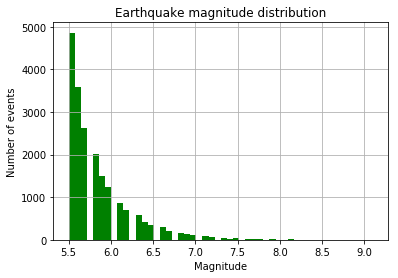

In [8]:
magnitudes = earthquakes['Mag']
plt.hist(magnitudes, bins=50, facecolor='g', alpha=1)
plt.xlabel('Magnitude')
plt.ylabel('Number of events')
plt.title('Earthquake magnitude distribution')
plt.grid()

### Investigate the Guttenberg-Richter relationship 

The Guttenberg-Richter relationship between earthquake magnitude M and number of events N having magnitude > M is as follows

$$\text{log}_{10}(N) = a - bM$$

In [9]:
M = np.arange(5.5,9,0.1)
greater_than = []
for magnitude in M:
    gt = len(np.where(magnitudes>=magnitude)[0]) #number of events > M
    greater_than.append(gt)

Text(0,0.5,'N')

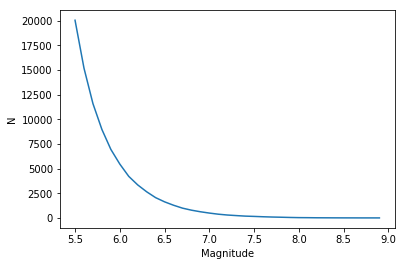

In [10]:
plt.plot(M,greater_than)
plt.xlabel('Magnitude')
plt.ylabel('N')

Text(0,0.5,'Log10(N)')

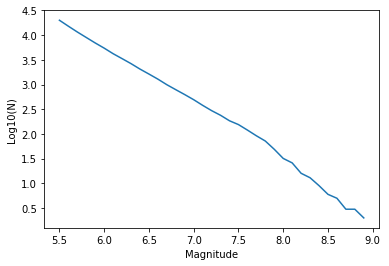

In [11]:
plt.plot(M,np.log10(greater_than))
plt.xlabel('Magnitude')
plt.ylabel('Log10(N)')

### Fit a linear relationship to M and N using np.polyfit 
### i.e. A polynomail in the form M = mN + c

Our b value will be '-m' in this case and our a value will be 'c'

In [12]:
z = np.polyfit(M,np.log10(greater_than),1)
p = np.poly1d(z)

b = -z[0]
a = z[1]

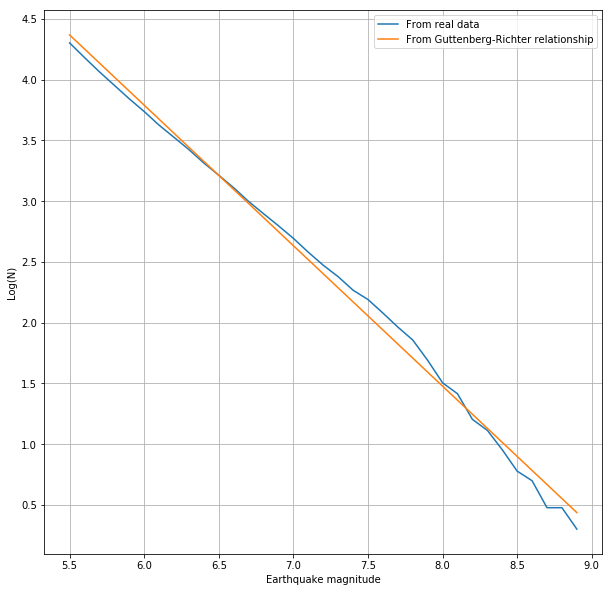

In [13]:
f1 = plt.figure(figsize=(10,10))
plt.plot(M,np.log10(greater_than),label='From real data')
plt.plot(M,p(M),label='From Guttenberg-Richter relationship')
plt.grid()
plt.legend()
plt.xlabel("Earthquake magnitude")
plt.ylabel("Log(N)")
plt.show()

In [14]:
a,b

(10.727001127840872, 1.1562061696416306)

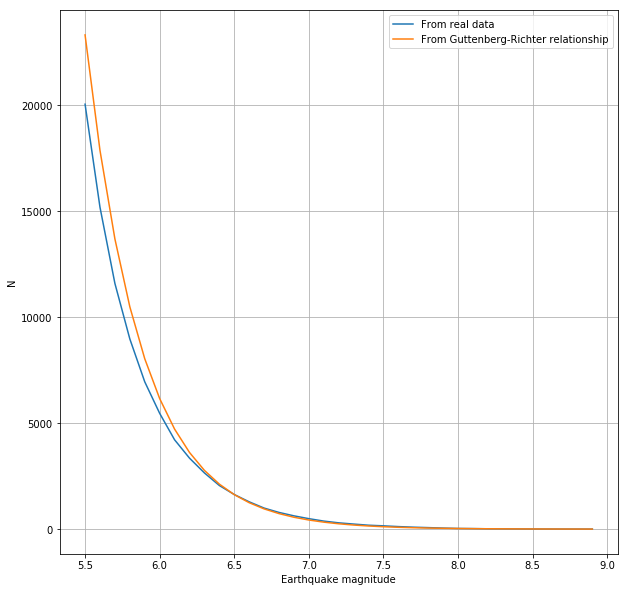

In [15]:
f1 = plt.figure(figsize=(10,10))
plt.plot(M,greater_than,label='From real data')
plt.plot(M,10**p(M),label='From Guttenberg-Richter relationship')
plt.grid()
plt.xlabel("Earthquake magnitude")
plt.ylabel("N")
plt.legend()
plt.show()

### Choose a subset of the events and plot them on a map

In [22]:
quakes_to_plot = earthquakes.sample(1000)  #keep this sample number quite small to save runtime
lons = quakes_to_plot['Lon']
lats = quakes_to_plot['Lat']

/Users/rmartinshort/anaconda/envs/py36/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:1711: MatplotlibDeprecationWarning: The axesPatch function was deprecated in version 2.1. Use Axes.patch instead.
  if limb is not ax.axesPatch:


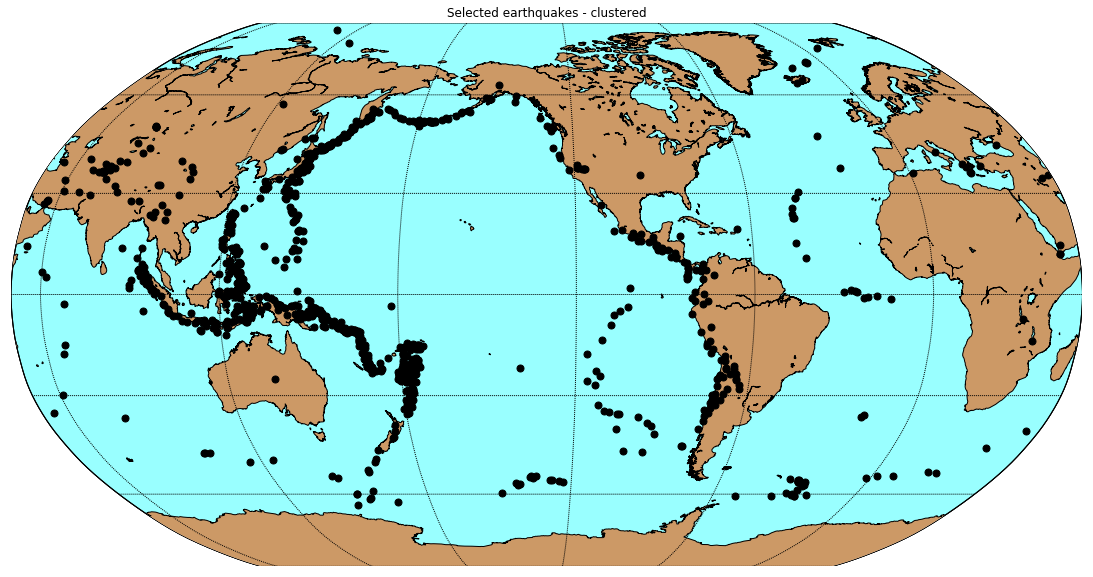

In [21]:
plot_earthquakes(lons,lats)